In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Exploration

In [228]:
import pandas as pd
path = '../data/'
data = pd.read_csv(path+"CreditTraining.csv")
data.head()

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


### Summary:

In this section we will find the importance of each feature individually to have Y=1.

* *Categorical features*: [Customer_Type, P_Client, Educational_Level, Marital_Status, Prod_Sub_Category, Source, Type_Of_Residence, Prod_Category]

* *Date Features*: [BirthDate, Customer_Open_Date, Prod_Decision_Date, Prod_Closed_Date]
all of them will be transformed in years gap, behaving as a numerical feature.

* Numerical Features: [Years_At_Residence, Net_Annual_Income, Years_At_Business, Number_Of_Dependant, Nb_Of_Products]


Percentage of Non Existing Client with y=1: 
0.07773512476007678
Percentage of Existing Client with y=1: 
0.08060182697474476


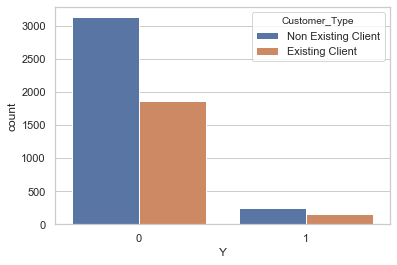

In [219]:
# Id_Customer: no relation to Y. 
CType = ['Non Existing Client', 'Existing Client']
for var in CType:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ]['Customer_Type'].value_counts()[var] / data[ data['Y'] == 0 ]['Customer_Type'].value_counts()[var])

#Customer Type
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue='Customer_Type', data=data)

Small diference for a given customer type. Not a great importance for the model.

Percentage of P_Client with y=1: 
0.04040404040404041
Percentage of NP_Client with y=1: 
0.08211718579830102


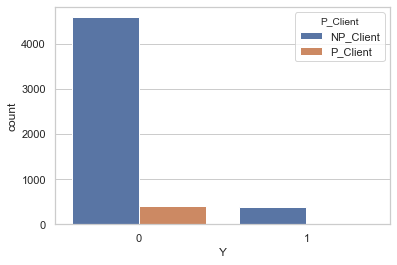

In [217]:
#P_Client
P = ['P_Client', 'NP_Client']
for p in P:
    print('Percentage of ' + p + ' with y=1: ')
    print(data[ data['Y'] == 1 ]['P_Client'].value_counts()[p] / data[ data['Y'] == 0 ]['P_Client'].value_counts()[p])
    
g = sns.countplot(x="Y", hue='P_Client', data=data)

Key take: P_clients are less likely to receive Y=1.

Percentage of University with y=1: 
0.08160036166365281
Percentage of Master/PhD with y=1: 
0.058823529411764705
Percentage of Diploma with y=1: 
0.05454545454545454


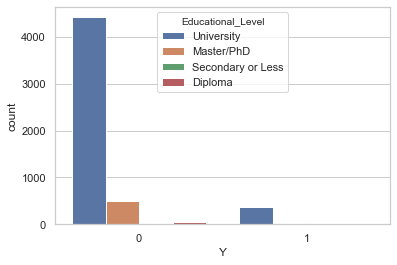

In [215]:
#Educational Level

Ed_level = ['University', 'Master/PhD', 'Diploma']
for ed in Ed_level:
    print('Percentage of ' + ed + ' with y=1: ')
    print(data[ data['Y'] == 1 ]['Educational_Level'].value_counts()[ed] / data[ data['Y'] == 0 ]['Educational_Level'].value_counts()[ed])
    
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue='Educational_Level', data=data)

Key take: secondary or less usually don't receive Y=1. Other categories are relatively balanced

Percentage of Married with y=1: 
0.0743295019157088
Percentage of Single with y=1: 
0.09758656873032528
Percentage of Widowed with y=1: 
0.06666666666666667
Percentage of Divorced with y=1: 
0.08620689655172414


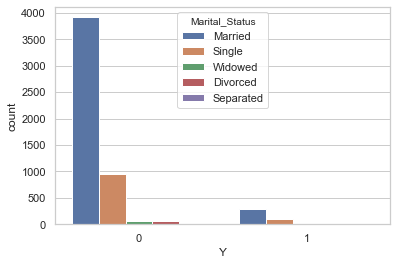

In [227]:
# Marital Status
feature = 'Marital_Status'
Var = ['Married', 'Single', 'Widowed', 'Divorced']
for var in Var:
    print('Percentage of ' + var + ' with y=1: ')
    print(data[ data['Y'] == 1 ][feature].value_counts()[var] / data[ data['Y'] == 0 ][feature].value_counts()[var])

#Customer Type
sns.set(style="whitegrid")
g = sns.countplot(x="Y", hue=feature, data=data)

Key takes: Not enough data to say the influence of Separated Marital Status to Y=1. Other categories seems to have low importance

# Model 

In [175]:
data = pd.read_csv("df_cluster.csv")
Y = data['Y']
data = data.drop(['Y', 'Customer_Type_Non Existing Client', 'P_Client_NP_Client', 'Source_Sales', 
         'DAY(Customer_Open_Date)', 'DAY(BirthDate)', 'DAY(Prod_Decision_Date)', 
         'MONTH(Customer_Open_Date)', 'MONTH(BirthDate)', 'MONTH(Prod_Decision_Date)',
         'WEEKDAY(Customer_Open_Date)', 'WEEKDAY(BirthDate)', 'WEEKDAY(Prod_Decision_Date)', 
        'YEAR(Prod_Decision_Date)', 'Day(Prod_Closed_Date)', 'Month(Prod_Closed_Date)',
        'Age(Prod_Decision_Date)', 'Gap' ], axis=1)

In [176]:
data.columns

Index(['Year(Prod_Closed_Date)', 'Customer_Type_Existing Client',
       'P_Client_P_Client', 'Educational_Level_Diploma',
       'Educational_Level_Master/PhD', 'Educational_Level_Secondary or Less',
       'Educational_Level_University', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Separated',
       'Marital_Status_Single', 'Marital_Status_Widowed',
       'Prod_Sub_Category_C', 'Prod_Sub_Category_G', 'Prod_Sub_Category_P',
       'Source_Branch', 'Type_Of_Residence_Company',
       'Type_Of_Residence_New rent', 'Type_Of_Residence_Old rent',
       'Type_Of_Residence_Owned', 'Type_Of_Residence_Parents',
       'Prod_Category_A', 'Prod_Category_B', 'Prod_Category_C',
       'Prod_Category_D', 'Prod_Category_E', 'Prod_Category_F',
       'Prod_Category_G', 'Prod_Category_H', 'Prod_Category_I',
       'Prod_Category_J', 'Prod_Category_K', 'Prod_Category_L',
       'Prod_Category_M', 'Number_Of_Dependant', 'Years_At_Residence',
       'Net_Annual_Income', 

In [177]:
data

,Year(Prod_Closed_Date),Customer_Type_Existing Client,P_Client_P_Client,Educational_Level_Diploma,Educational_Level_Master/PhD,Educational_Level_Secondary or Less,Educational_Level_University,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Separated,...,Net_Annual_Income,Years_At_Business,Nb_Of_Products,YEAR(Customer_Open_Date),YEAR(BirthDate),KMeans 2,KMeans 3,Agglomerative Clustering Cosine,Agglomerative Clustering Euclidean,DBSCAN eps=3
0,0,0,0,0,0,0,1,0,1,0,...,36,1.0,1,2012,1977,0,2,0,1,1
1,0,1,1,0,0,0,1,0,1,0,...,18,2.0,1,2009,1974,1,1,1,0,0
2,0,0,0,0,0,0,1,0,1,0,...,36,1.0,1,2012,1973,0,2,0,1,1
3,2012,1,0,0,0,0,1,0,1,0,...,36,1.0,1,2011,1982,0,2,0,1,0
4,0,0,0,0,0,0,1,0,1,0,...,36,1.0,1,2012,1953,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,0,0,0,0,0,0,1,0,1,0,...,36,1.0,1,2011,1976,0,0,1,1,57
5376,2012,1,0,0,0,0,1,0,1,0,...,24816,1.0,1,2011,1982,0,2,1,1,0
5377,2013,0,0,0,0,0,1,1,0,0,...,144,30.0,1,2011,1950,0,2,0,1,0
5378,0,0,0,0,0,0,1,0,1,0,...,36,1.0,1,2012,1983,0,0,1,1,118


In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)

In [169]:
#Oversampling 

# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# ros = RandomOverSampler(random_state=0)
# # ros = SMOTE(random_state=0)
# # ros = ADASYN(random_state=0)
# X_train, y_train = ros.fit_resample(X_train, y_train)



In [179]:
import xgboost

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [180]:
# STEP 1 - First XGB - Highly Overfitted
# Fiz Learning Rate and n_estimators

xgb1_model = XGBClassifier( learning_rate=0.1, 
                                        n_estimators=1200,
                                        max_depth=6,
                                        min_child_weight=0,                         
                                        gamma=0,
                                        colsample_bytree=0.8,
                                        objective ='binary:logistic',
                                        scale_pos_weight = 1,
                                        seed=42)


xgb1_model.fit(X_train,y_train)
y_predicted = xgb1_model.predict(X_test)
y_predicted_train = xgb1_model.predict(X_train)


print('performance over the training set: ' + str(f1_score(y_train, y_predicted_train)))
print('performance over the test set: ' + str(f1_score(y_test, y_predicted)) + '\n')
print(classification_report(y_test, y_predicted))

performance over the training set: 0.998389694041868
performance over the test set: 0.5806451612903225

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       993
           1       0.62      0.54      0.58        83

    accuracy                           0.94      1076
   macro avg       0.79      0.76      0.77      1076
weighted avg       0.94      0.94      0.94      1076



In [181]:
# STEP 2 - Tuning max_depth and min_child_weight

param_test2 = {
    'max_depth':range(1,7,1),
    'min_child_weight':range(0,7,1)
}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=1200, 
                                                  max_depth=3,
                                                  min_child_weight=4,
                                                  gamma=0,  
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  scale_pos_weight=1, 
                                                  seed=42), 
                        param_grid = param_test2, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)


gsearch2.fit(X_train, y_train)
best_max_depth, best_min_child_weight = gsearch2.best_params_['max_depth'], gsearch2.best_params_['min_child_weight']
gsearch2.best_params_, gsearch2.best_score_

KeyboardInterrupt: 

In [173]:
#Testing New Parameters

xgb2_model = XGBClassifier( learning_rate=0.1, 
                                        n_estimators=1200,
                                        max_depth=best_max_depth,
                                        min_child_weight=best_min_child_weight,                         
                                        gamma=0,
                                        colsample_bytree=0.8,
                                        objective ='binary:logistic',
                                        scale_pos_weight = 1,
                                        seed=42)


xgb2_model.fit(X_train,y_train)
y_predicted = xgb2_model.predict(X_test)
y_predicted_train = xgb2_model.predict(X_train)


print('performance over the training set: ' + str(f1_score(y_train, y_predicted_train)))
print('performance over the test set: ' + str(f1_score(y_test, y_predicted)) + '\n')
print(classification_report(y_test, y_predicted))

performance over the training set: 0.9998748278883465
performance over the test set: 0.6363636363636364

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       993
           1       0.60      0.67      0.64        83

    accuracy                           0.94      1076
   macro avg       0.79      0.82      0.80      1076
weighted avg       0.94      0.94      0.94      1076



In [174]:
# STEP 3 - Tuning Gamma 

param_test3 = { 
    'gamma':[i/10.0 for i in range(0,5)] 
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=1200, 
                                                  max_depth = best_max_depth,
                                                  min_child_weight = best_min_child_weight,
                                                  gamma=0, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  scale_pos_weight=1,
                                                  seed=42), 
                        param_grid = param_test3, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

gsearch3.fit(X_train, y_train)
best_gamma = gsearch3.best_params_['gamma']
gsearch3.best_params_, gsearch3.best_score_

KeyboardInterrupt: 

In [ ]:
# Testing New Parameters

xgb3_model = XGBClassifier( learning_rate=0.1, 
                                        n_estimators=1200,
                                        max_depth=best_max_depth,
                                        min_child_weight=best_min_child_weight,                         
                                        gamma=best_gamma,
                                        colsample_bytree=0.8,
                                        objective = 'binary:logistic',
                                        scale_pos_weight = 1,
                                        seed=42)


xgb3_model.fit(X_train,y_train)
y_predicted = xgb3_model.predict(X_test)
y_predicted_train = xgb3_model.predict(X_train)


print('performance over the training set: ' + str(f1_score(y_train, y_predicted_train)))
print('performance over the test set: ' + str(f1_score(y_test, y_predicted)) + '\n')
print(classification_report(y_test, y_predicted))

In [ ]:
# STEP 4 - Tuning colsample_bytree and subsaample

param_test4 = {
    'subsample':[i/10.0 for i in range(7,11)],
    'colsample_bytree':[i/10.0 for i in range(7,11)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1200, 
                                                  max_depth = 3,
                                                  min_child_weight = 5,
                                                  gamma=0, 
                                                  subsample=1, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  scale_pos_weight=1,
                                                  seed=42), 
                        param_grid = param_test4, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

gsearch4.fit(X_train, y_train)
best_subsample, best_colsample_bytree = gsearch4.best_params_['subsample'], gsearch4.best_params_['colsample_bytree']
gsearch4.best_params_, gsearch4.best_score_

In [ ]:
# Testing New Parameters

xgb4_model = XGBClassifier( learning_rate=0.1, 
                                        n_estimators=1200,
                                        max_depth=best_max_depth,
                                        min_child_weight=best_min_child_weight,                         
                                        gamma=best_gamma,
                                        subsample= best_subsample,
                                        colsample_bytree= best_colsample_bytree,
                                        objective ='binary:logistic',
                                        scale_pos_weight = 1,
                                        seed=42)


xgb4_model.fit(X_train,y_train)
y_predicted = xgb4_model.predict(X_test)
y_predicted_train = xgb4_model.predict(X_train)


print('performance over the training set: ' + str(f1_score(y_train, y_predicted_train)))
print('performance over the test set: ' + str(f1_score(y_test, y_predicted)) + '\n')
print(classification_report(y_test, y_predicted))

In [ ]:
# STEP 5 - Tuning Regularization Parameters
# Lambda L2 Regularization

param_test5 = {
    'reg_lambda':[1e-2, 0.1, 0.5, 1, 2, 10]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1200, 
                                                  max_depth=best_max_depth,
                                                  min_child_weight=best_min_child_weight,                         
                                                  gamma=best_gamma,
                                                  subsample=best_subsample,
                                                  colsample_bytree=best_colsample_bytree,
                                                  reg_lambda = 2,
                                                  objective= 'binary:logistic', 
                                                  scale_pos_weight=1,
                                                  seed=42), 
                        param_grid = param_test5, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

gsearch5.fit(X_train, y_train)
best_reg_lambda = gsearch5.best_params_['reg_lambda']
gsearch5.best_params_, gsearch5.best_score_

In [ ]:
# Closer Look - Lambda L2 Regularization

param_test5 = {
    'reg_lambda':[0.7*best_reg_lambda, 0.8*best_reg_lambda, best_reg_lambda, 1.5*best_reg_lambda, 3*best_reg_lambda]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1200, 
                                                  max_depth=best_max_depth,
                                                  min_child_weight=best_min_child_weight,                         
                                                  gamma=best_gamma,
                                                  subsample=best_subsample,
                                                  colsample_bytree=best_colsample_bytree,
                                                  reg_lambda = best_reg_lambda,
                                                  objective= 'binary:logistic', 
                                                  scale_pos_weight=1,
                                                  seed=42), 
                        param_grid = param_test5, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

gsearch5.fit(X_train, y_train)
best_reg_lambda = gsearch5.best_params_['reg_lambda']
gsearch5.best_params_, gsearch5.best_score_

In [ ]:
# Even Closer Look - Lambda L2 Regularization

param_test5 = {
    'reg_lambda':[0.66*best_reg_lambda, 0.8*best_reg_lambda, best_reg_lambda, 1.5*best_reg_lambda, 3*best_reg_lambda]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1200, 
                                                  max_depth=best_max_depth,
                                                  min_child_weight=best_min_child_weight,                         
                                                  gamma=best_gamma,
                                                  subsample=best_subsample,
                                                  colsample_bytree=best_colsample_bytree,
                                                  reg_lambda = best_reg_lambda,
                                                  objective= 'binary:logistic',  
                                                  scale_pos_weight=1,
                                                  seed=42), 
                        param_grid = param_test5, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

gsearch5.fit(X_train, y_train)
best_reg_lambda = gsearch5.best_params_['reg_lambda']
gsearch5.best_params_, gsearch5.best_score_

In [ ]:
# Alpha L1 Regularization

param_test5 = {
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=1200, 
                                                  max_depth=best_max_depth,
                                                  min_child_weight=best_min_child_weight,                         
                                                  gamma=best_gamma,
                                                  subsample=best_subsample,
                                                  colsample_bytree=best_colsample_bytree,
                                                  reg_lambda = best_reg_lambda,
                                                  objective= 'binary:logistic', 
                                                  scale_pos_weight=1,
                                                  seed=42), 
                        param_grid = param_test5, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

gsearch5.fit(X_train, y_train)
best_reg_alpha = gsearch5.best_params_['reg_alpha']
gsearch5.best_params_, gsearch5.best_score_


In [ ]:
# STEP 6 - Reducing Learning Rate and Adding More Trees

param_test6 = {
    'learning_rate':[i/100.0 for i in range(5,20,2)]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, 
                                                  n_estimators=3000, 
                                                  max_depth=best_max_depth,
                                                  min_child_weight=best_min_child_weight,                         
                                                  gamma=best_gamma,
                                                  subsample=best_subsample,
                                                  colsample_bytree=best_colsample_bytree,
                                                  reg_lambda=best_reg_lambda,
                                                  reg_alpha=best_reg_alpha,
                                                  objective= 'binary:logistic', 
                                                  scale_pos_weight=1,
                                                  seed=42), 
                        param_grid = param_test6, 
                        scoring='f1',
                        n_jobs=4,
                        iid=False, 
                        cv=3)

gsearch6.fit(X_train, y_train)
best_LR = gsearch6.best_params_['learning_rate']
gsearch6.best_params_, gsearch6.best_score_

In [ ]:
#Final Evaluation


xgb6_model = XGBClassifier(learning_rate=best_LR, 
                                        n_estimators=3000,
                                        max_depth=best_max_depth,
                                        min_child_weight=best_min_child_weight,                         
                                        gamma=best_gamma,
                                        subsample=best_subsample,
                                        colsample_bytree=best_colsample_bytree,
                                        reg_lambda=best_reg_lambda,
                                        reg_alpha=best_reg_alpha,
                                        objective= 'binary:logistic', 
                                        scale_pos_weight = 1,
                                        seed=42)


xgb6_model.fit(X_train,y_train)
y_predicted = xgb6_model.predict(X_test)
y_predicted_train = xgb6_model.predict(X_train)


print('performance over the training set: ' + str(f1_score(y_train, y_predicted_train)))
print('performance over the test set: ' + str(f1_score(y_test, y_predicted)) + '\n')
print(classification_report(y_test, y_predicted))

In [142]:
#Final Evaluation


xgb6_model = XGBClassifier(learning_rate=0.07, 
                                        n_estimators=2000,
                                        max_depth=6,
                                        min_child_weight=0,                         
                                        gamma=0,
                                        subsample=1,
                                        colsample_bytree=0.8,
                                        reg_alpha=0,
                                        reg_lambda=3,
                                        objective ='binary:logistic',
                                        scale_pos_weight = 1,
                                        seed=42)


xgb6_model.fit(X_train,y_train)
y_predicted = xgb6_model.predict(X_test)
y_predicted_train = xgb6_model.predict(X_train)


print('performance over the training set: ' + str(f1_score(y_train, y_predicted_train)))
print('performance over the test set: ' + str(f1_score(y_test, y_predicted)) + '\n')
print(classification_report(y_test, y_predicted))

performance over the training set: 0.9821098087600247
performance over the test set: 0.6376811594202898

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       993
           1       0.53      0.80      0.64        83

    accuracy                           0.93      1076
   macro avg       0.76      0.87      0.80      1076
weighted avg       0.95      0.93      0.94      1076

